In [1]:
import pandas as pd
from sklearn import svm
svc = svm.SVC(gamma=0.001,C=100)

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

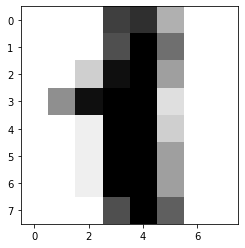

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[1],cmap=plt.cm.gray_r,interpolation='nearest')

In [6]:
df=pd.DataFrame(digits['data'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


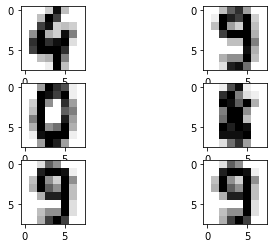

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(321)
plt.imshow(digits.images[1791],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1795],cmap=plt.cm.gray_r,interpolation='nearest')

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [9]:
scaled_data=scaler.transform(df)
scaled_data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [10]:

from sklearn.decomposition import PCA
pca =PCA(n_components=5)

In [11]:
pca.fit(scaled_data)

PCA(n_components=5)

In [12]:
transformed_pca=pca.transform(scaled_data)

In [13]:
x=transformed_pca
y=digits['target']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:

from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [16]:
predict=model.predict(x_test)

In [17]:
accuracy=accuracy_score(y_test,predict)
accuracy

0.8611111111111112